# Digitizing an Analog Signal

A voltmeter provides us with a continuous read out of the electrical signal that is produced by our microphone.
As defined earlier, this means that we are working with an analog signal.
We want to record this signal to some sort of digital file so that our audio recording can be replayed and analyzed later.
As far as we're are concerned, the proverbial needle on our voltmeter can land anywhere on a continuum of volt values and its exact position on that continuum varies smoothly in time.
Describing the *exact* evolution of measurements being made by the voltmeter would amount to us discovering a symbolic representation (i.e. a mathematical function) that perfectly describes its behavior over time.
This is not viable; not at all.

Instead, we will proceed to **discretize the measurements of our voltmeter in both time and magnitude**.
That is, we will pick distinct moments in time at which we will record values of our voltmeter. 
At these select times, we will record numbers (whose units are volts) up to some some limited numerical precision. 
This means that, to an extent, we will not care about minor differences in the exact pointing direction of the voltmeter's needle.
In practice, this means that will write down our numbers up to a limited number of decimal places.
We will then represent these measurements as numbers that a computer can understand.
The process just described amounts to **encoding our analog signal as a digital signal**.



While there are many ways to go about digitizing an analog signal, we will be focusing on a particularly simple method known as **pulse code modulation (PCM)**.
The method of PCM simply requires that we specify two quantities in order to define our sampling process: 

1. **Sampling rate**, $f_s$, which determines how frequently we record measurements from the voltmeter.
2. **Bit depth**, $N_b$, which effectively determines the precision with which we record our measurements. To be explicit, it specifies *how much computer memory* we are willing use to store each measurement.

## Sampling Rate

The sampling rate of the PCM process is denoted by $f_s$;
it simply specifies the number of **evenly-spaced** samples, or measurements, that we should record from our voltmeter in a given unit of time, starting at the earliest possible time.
We can use units of Hertz ($\mathrm{Hz}$) to specify the number of samples to collect per second.
Thus if our recording has a duration of $T$, then we will record

\begin{equation}
N_{\mathrm{samples}} = \lfloor f_s T \rfloor + 1
\end{equation}

number of samples.
We must always record an integer number of samples, which is why we take the "floor" of $f_s T$. 
The floor operator is denoted by $\lfloor \;\rfloor$, and behaves by returning the smallest integer neighbor to the number that it operates on; e.g. $\lfloor 3.92 \rfloor = 3$.
Thus, given an arbitrary analog signal represented by $f(t)$ that lasts for a duration $T$, we will record $N_{\mathrm{samples}}$ at intervals of $\Delta t = \frac{1}{f_s}$:

\begin{equation}
f(t) \rightarrow \big[f(0),\;f(\Delta t),\;f(2 \Delta t),\ldots ,\;f((N_{\mathrm{samples}} - 1)\Delta t)\big]
\end{equation}


The following plot depicts an analog signal (indicated by the smoothly-varying dashed blue line) that is sampled at a rate of $1 \; \mathrm{Hz}$.
The code for reproducing this plot is included at the bottom of this page.
It is advised that you experiment with the sampling rate and see how it affects the appearance of this plot. 

<div class="alert alert-info">

**Reading Comprehension: Sample Rate**

Given an analog signal that lasts for $127.2 \; \mathrm{seconds}$, if we use sample at a rate of $0.5 \; \mathrm{Hz}$, how many samples should we expect to collect?
Compute your answer using pen and paper and using Python.
Note that you can import the `floor` function from the standard library's `math` module, or you can simply call `int()` on the number to the same effect.
</div>


<div class="alert alert-info">

**Reading Comprehension: Writing a Sampler**

Complete the body of the following Python function that will extract samples that are evenly-spaced in time from an analog signal:
    
```python
def temporal_sampler(signal, duration, sampling_rate):
    """
    Extracts samples from an analog signal according to the specified sampling rate,
    returning the times and the corresponding samples
    
    Parameters
    ----------
    signal : Callable[[ndarray], ndarray]
        Another Python function (i.e. a "callable"), which behaves like f(t) 
        and accepts a time value (in seconds) as an input and returns a 
        measurement (in volts) as an output. You can expect this to behave like 
        a vectorized function i.e. it can be passed a NumPy-array of input times 
        and it will return a corresponding array of measurements. 
        
    duration : float 
        The duration of the signal, specified in seconds (a non-negative float)
    
    sampling_rate : float
        The sampling rate specified in Hertz.
    
    Returns
    -------
    (times, samples) : Tuple[ndarray, ndarray]
        The shape-(N,) array of times and the corresponding shape-(N,) array 
        samples extracted from the analog signal
    
    """
    pass
```
</div>

**The standard PCM sampling rate used by the audio industry is** $44,100\;\mathrm{Hz}$.
This number is based on the range of audio frequencies that humans can perceive – we can hear up to roughly $20,000\;\mathrm{Hz}$.
To gain some insight into this, complete the following exercise.


<div class="alert alert-info">

**Reading Comprehension: Aliasing**

**Aliasing** is said to occur when the sampling process causes distinct signals to appear as being indistinguishable from one another.
This exercise will demonstrate simple instance of temporal aliasing. 
    
Using the analog signal
    
```python
import numpy as np

def f(t):
    freq = 10 # Hz
    return np.cos(2 * np.pi * freq * t)
```
    
Plot this $10 \; \mathrm{Hz}$ sinusoidal signal densely (using many points, so that it appears to be continuous) over a $0.5 \;\mathrm{second}$ interval.
Now, use your `temporal_sampler` function from the previous exercise to sample this signal, **using a sampling rate that matches the frequency of the signal** ($10 \; \mathrm{Hz}$); plot these samples on top of the analog signal.
What do you notice about these samples? 
What is the simplest analog signal that you can imagine that would produce the exact same samples?
Put another way: if all you saw were these samples, what is the analog signal that would you *think* they describe?

Now, re-sample the signal at with the sampling rate doubled and plot the results.
Do these samples do a better job of representing our signal? 
    
This doubling between the highest frequency of an analog signal and the minimum viable sampling rate needed to discretize it "faithfully" has a special name: this sampling rate is known as the "Nyquist rate", as prescribed by the [Nyquist–Shannon sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem).
In general, one needs to use a sampling rate that exceeds the Nyquist rate (twice the highest-frequency component of the analog signal) in order to be able to faithfully reconstruct the analog signal from the samples.
    
Reflecting on this, and given that we humans can perceive tones with frequencies up to roughly $20,000\;\mathrm{Hz}$, why might the audio industry use a sampling rate of $44,100\;\mathrm{Hz}$ for digitizing audio signals?
    
(Aside: If you have ever tweaked an "anti-aliasing" parameter in a video game's settings, this is to help prevent aliasing in the spatially-sampled illumination values that will be displayed on your screen, which can cause undesirable pixelation effects.)
</div>

## Bit Depth

We just reviewed the process of discretizing our analog signal in time by establishing a temporal sampling rate.
Now we will discretize the *magnitudes* of the values that we record from out voltmeter;
we will do this by establishing a **bit-depth** for our digitization process.
This will, in effect, decide the number of "significant digits" that we use to record our measurements.

### Computer Memory: bits and bytes

The bit-depth of our measurements is the amount of computer memory – measured in **bits** – that we will dedicate to storing each one of our measurements.
A single bit is capable of storing two states, which we can think of a $0$ or a $1$; that is, it is a unit of memory that can store one "**b**inary dig**it**".
Thus a sequence of two bits together can represent distinct $4$ states:

```
1) 00
2) 01
3) 10
4) 11
```

A sequence of three bits can represent $8$ distinct states:

```
 1) 000
 2) 001
 3) 010
 4) 011
 5) 100
 6) 101
 7) 110
 8) 111
```

We can deduce that, in general, a sequence of $N_b$ bits can represent $2 ^ {N_{b}}$ distinct states.
An important note of terminology: 8 bits corresponds to a **byte**, in the jargon of computer science. 
Thus a megabyte is $10^6$ bytes, or $8 \times 10^6$ bits, of memory, and a gigabyte is $10^9$ bytes.

### Quantizing and Digitizing Measurements

Once we decide on a bit-depth — the number of bits that we will afford to each of our measurements — then we know the number of distinct values that we are capable of recording.
Thus we must *quantize* the measurements from our voltmeter, which produces readouts on a continuum of values, accordingly.
That is, if we were to choose a bit-depth of 8, then we need would need to "bin" the measurements of our voltmeter so that any readout that it provides can be associated with one of $2 ^ {8} = 256$ distinct values (in units of volts). 
This is no different than taking a $1 \;\mathrm{meter}$ ruler and deciding that we are going to take measurements to the nearest centimeter: while the ruler can be used to measure lengths on a continuum, our measurements will only be able to take on one of $100$ values, according to the nearest centimeter "tick" that our measurement falls against.

The following figure shows one period of a sine wave quantized using various bit-depths.

Note that the number of quantized steps available,  $2 ^ {N_{b}}$, increases  exponentially with the number of bits that we allot per measurement; thus the apparent smoothness of the quantized signal improves rapidly with increasing bit-depth.  


<div class="alert alert-info">

**Reading Comprehension: Quantization**

Write a python function called `quantize`, which performs the quantization process discussed above.
Read the docstring for the function "stub" provided below.
Note that you need not convert the quantized values to sequences of binary digits.
    
```python
def quantize(samples, bit_depth):
    """
    Given an array of N samples and a bit-depth of M, return the array of
    quantized samples derived from the domain [samples.min(), samples.max()] 
    that has been quantized into 2**M evenly-spaced values.
    
    Parameters
    ----------
    samples : numpy.ndarray, shape-(N,)
        An array of N samples
    
    bit_depth: int
        The bit-depth, M, used to quantize the samples among
        2**M evenly spaced values spanning [samples.min(), samples.max()]
    
    Returns
    -------
    quantized_samples : numpy.ndarray, shape-(N,)
        The corresponding array where each sample has been replaced
        by the nearest quantized value
    
    Examples
    --------
    >>> import numpy as np
    >>> samples = np.array([0, .25, .75, 1])
    >>> quantize(samples, 1) # bit-depth 1: quantize among 2**1 values
    array([0., 0., 1., 1.])
    >>> quantize(samples, 2) # bit-depth 2: quantize among 2**2 values
    array([0., 0.3333, .6666, 1.])
    """
    # include this line of code to prevent yourself from
    # trying such a large bit-depth that your computer 
    # becomes overburdened
    assert bit_depth <= 14, "Exceeding this bit-depth might tank your computer!"
    
    # your code here
```
</div>

Having quantized the measurements of our voltmeter, it is trivial to map each quantized value with its corresponding sequence of $N_b$ bits.
When we store this data in a digital file on our computer, we can include the requisite information (in the "header" of the file) needed to correspond each distinct bit sequence back to its associated measurement value.
Recall that we would also need to record the temporal sampling rate that we used as well, so that we reconstruct the temporal layout of our samples.

An audio signal encoded using a shallow bit-depth will play back with severe artifacts: smoothly varying fluctuations in air pressure of the original sound wave will be reconstructed with sharp transitions between flattened, quantized amplitudes.
Our ears are quite sensitive to these artificial aberrations; we will have the chance to "resample" some of our favorite songs with different bit-depths and sample rates to see how these factors affect the our perception of the music.

The standard bit-depth for audio encoding is $16$ bits (or $2$ bytes);
this affords us a high "resolution" of $2^{16 }= 65,536$ distinct quanta for recording values from our voltmeter.


<div class="alert alert-info">

**Reading Comprehension: The Size of an Audio File**

Find an mp3 file on your computer or device, and check to see how long the song is.
Based on this number, and using the standard PCM encoding parameters:
    
- $f_s = 44,100\; \mathrm{Hz}$
- $N_d = 16\; \mathrm{bits}$

compute how large you would expect this digital audio file to be, had it been written using PCM encoding, to the nearest tenth of a megabyte.
Compare this to the actual size of the file on your computer.
You should see that the size of mp3 file is considerably smaller than your calculated PCM file.
This is because the mp3 format is a compressed audio format that can reduce the memory footprint of a recording by, among other things, filtering out data that would be imperceivable to the listener.

In the next section of this module, we will learn about the Fourier transform, which is a key mathematical method by which we can "excise" inaudible parts of the data being encoded into the mp3 file. 
</div>


<div class="alert alert-info">

**Reading Comprehension: Putting It All Together**

Study the PCM sampling process depicted below.
What is the temporal sampling rate and apparent bit-depth used here?
</div>

## Reading Comprehension Exercise Solutions

**Sample Rate: Solution**

Given an analog signal that lasts for $127.2 \mathrm{seconds}$, if we use sample at a rate of $0.5 \; \mathrm{Hz}$, how many samples should we expect to collect?
Compute your answer using pen and paper and using Python.

\begin{equation}
N_{\mathrm{samples}} = \lfloor f_s T \rfloor + 1 = \bigg\lfloor 0.5\;\frac{1}{\mathrm{seconds}}\times 127.2\;\mathrm{seconds} \bigg\rfloor + 1 = \lfloor 63.6 \rfloor + 1 = 64
\end{equation}

```python
>>> fs = 0.5  # Hz
>>> T = 127.2 # seconds
>>> int(fs * T) + 1  # number of samples
64
```

**Writing a Sampler: Solution**

The function `numpy.arange(N)` produces the array $[0,\;1,\dots\;N-1\big]$, which can be conveniently transformed into the array of times at which we we sample our signal: $\big[0,\;\Delta t,\;\ldots ,\;(N - 1)\Delta t\big]$.
Once we have done this, we can simply leverage the assumption that `signal` is a [vectorized function](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html) and call it on this array of times. 

Note that, in my solution, I have added an asterisk in my function signature, preceding `duration`.
This ensures that `duration` and `sampling_rate` must have their values be specified *by name* when invoking `temporal_sampler`.
This ensures that we do not accidentally pass our duration as our sampling rate and vice versa.

In [1]:
import numpy as np
from math import floor


def temporal_sampler(signal, *, duration, sampling_rate):
    """
    Extracts samples from an analog signal according to the specified sampling rate,
    returning the times and the corresponding samples

    Parameters
    ----------
    signal : Callable[[ndarray], ndarray]
        Another Python function (i.e. a "callable"), which behaves like f(t) 
        and accepts a time value (in seconds) as an input and returns a 
        measurement (in volts) as an output. You can expect this to behave like 
        a vectorized function i.e. it can be passed a NumPy-array of input times 
        and it will return a corresponding array of measurements. 

    duration : float 
        The duration of the signal, specified in seconds (a non-negative float)

    sampling_rate : float
        The sampling rate specified in Hertz.

    Returns
    -------
    (times, samples) : Tuple[ndarray, ndarray]
        The shape-(N,) array of times and the corresponding shape-(N,) array 
        samples extracted from the analog signal

    """
    N_samples = floor(sampling_rate * duration) + 1

    # shape-(N,) array of times at which we sample the analog signal
    times = np.arange(N_samples) * (1 / sampling_rate)  # seconds

    # shape-(N,) array of samples extracted from the analog signal
    samples = signal(times)

    return times, samples

**Aliasing: Solution**

Using the analog signal
    
```python
import numpy as np

def f(t):
    freq = 10 # Hz
    return np.cos(2 * np.pi * freq * t)
```
    
Plot this $10 \; \mathrm{Hz}$ sinusoidal signal densely (so that it looks continuous) over a $0.5 \;\mathrm{second}$ interval.
Now, use your `temporal_sampler` function from the previous exercise to sample this signal, **using a sampling rate that matches the frequency of the signal** ($10 \; \mathrm{Hz}$); plot these samples on top of the analog signal.
What do you notice about these samples?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import floor

%matplotlib inline

def plot_samples_on_signal(signal, *, duration, sampling_rate):
    fig, ax = plt.subplots()

    # we densely sample the analog signal to make it look like
    # it is continuous
    dense_t = np.linspace(0, duration, 10000)  # seconds
    ax.plot(dense_t, signal(dense_t), ls="--", label="Analog Signal", alpha=0.5)

    times, samples = temporal_sampler(signal=signal, duration=duration, sampling_rate=sampling_rate)

    # creates the stem plot indicating our samples
    ax.stem(
        times,
        samples,
        "red",
        markerfmt="ro",
        basefmt=" ",
        label="samples",
        use_line_collection=True
    )
    ax.set_xlabel("Time [seconds]")
    ax.set_ylabel("Volts")
    ax.set_title("Discretizing an Analog Signal in Time")
    ax.grid(True)
    return fig, ax

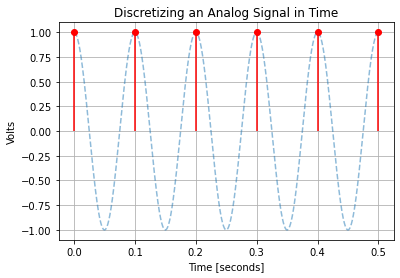

In [3]:
import numpy as np

def f(t):
    freq = 10 # Hz
    return np.cos(2 * np.pi * freq * t)

fig, ax = plot_samples_on_signal(signal=f, duration=0.5, sampling_rate=10)

What do you notice about these samples? Can you imagine a far simpler function that would produce the exact same samples?

> The samples all fall exactly on the same position of the signal's periodic form. None of the signal's dynamics are captured by these samples – we could have sampled a *constant* (flat) signal to the exact same effect, meaning that this sampled signal makes no noise.
> That is to say, this sampling rate causes our sinusoidal analog signal and a flat signal to be "aliases" of one another.


Now, re-sample the signal at with the sampling rate doubled and plot the results.
Do these samples do a better job of representing our signal? 

Reflecting on this, and given that we humans can perceive tones with frequencies up to roughly $20,000\;\mathrm{Hz}$, why might the audio industry use a sampling rate of $44,100\;\mathrm{Hz}$ for digitizing audio signals?

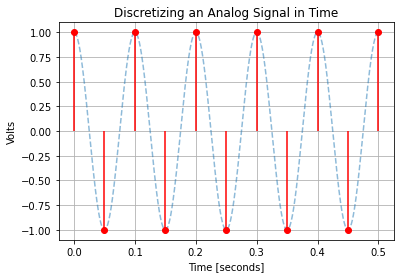

In [4]:
fig, ax = plot_samples_on_signal(signal=f, duration=0.5, sampling_rate=20.)

> Doubling the sampling rate allows our samples to capture the frequency and periodicity of the analog signal.
> It breaks the "aliasing" that we were experiencing at the $10\;\mathrm{Hz}$ sampling rate, where the samples appeared to reflect a constant signal.
> Similarly, we want our digital recording to capture the highest-frequency tones that we can perceive.
> We want to avoid matching the sampling rate of the highest frequency, lest it get "washed out" as a constant signal.

> The sampling rate of $44,100\;\mathrm{Hz}$ exceeds the Nyquist rate for a $20,000\;\mathrm{Hz}$ tone; this satisfies the Nyquist–Shannon sampling theorem, which provides some context for why this is the defacto sampling rate for the audio industry. 

**Quantization: Solution**

Write a python function called `quantize`, which performs the quantization process discussed above.
Read the docstring for the function "stub" provided below.
Note that you need not convert the quantized values to sequences of binary digits.
    
> Although we can complete this task using for-loops, it is more concise and efficient to leverage numpy's semantics for [vectorized operations](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html).
> We will need to leverage [broadcasting](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/Broadcasting.html) and [advanced indexing with integer arrays](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/AdvancedIndexing.html#Integer-Array-Indexing) in our solution.

In [5]:
import numpy as np

def quantize(samples, bit_depth):
    """
    Given an array of N samples and a bit-depth of M, return the array of
    quantized samples derived from the domain [samples.min(), samples.max()] 
    that has been quantized into 2**M evenly-spaced values.
    
    Parameters
    ----------
    samples : numpy.ndarray, shape-(N,)
        An array of N samples
    
    bit_depth: int
        The bit-depth, M, used to quantize the samples among
        2**M evenly spaced values spanning [samples.min(), samples.max()].
    
    Returns
    -------
    quantized_samples : numpy.ndarray, shape-(N,)
        The corresponding array where each sample has been replaced
        by the nearest quantized value
    
    Examples
    --------
    >>> import numpy as np
    >>> samples = np.array([0, .25, .75, 1])
    >>> quantize(samples, 1) # quantize among 2 values
    array([0., 0., 1., 1.])
    >>> quantize(samples, 1) # quantize among 4 values
    array([0., 0.3333, .6666, 1.])
    """
    
    assert bit_depth <= 14, "Exceeding this bit-depth might tank your computer!"
    
    # create the 2**M evenly-spaced quantized values, 
    # spanning [samples.min(), samples.max()] 
    quantized_values = np.linspace(samples.min(), samples.max(), 2 ** bit_depth)
    
    # Broadcast subtract: shape-(N, 1) w/ shape-(M**2,) -> shape(N, M**2)
    # `abs_differences[i]` is the absolute difference between sample-i and
    # each of the M**2 quantized values
    abs_differences = np.abs(samples[:, np.newaxis] - quantized_values)
    
    # For each sample, find which quantized value it is closest to.
    # Produced shape-(N,) array on indices on [0, 2**M)
    bin_lookup = np.argmin(abs_differences, axis=1)
    
    # Populate a shape-(N,) array, where each sample has been
    # replaced by its nearest quantized value. This leverages
    # advanced integer-array indexing
    return quantized_values[bin_lookup]

**The Size of an Audio File: Solution**

Using a four minute song as a reference, we would expect a PCM-encoded digital audio file, using a bit-depth of $16$ bits and a sampling rate of $44.1\;\mathrm{kHz}$ to take up:

\begin{equation}
4 \;\mathrm{minutes}\times 60\;\frac{\mathrm{seconds}}{\mathrm{minute}}\times 44,100\;\frac{\mathrm{samples}}{\mathrm{second}}
 \times 16\;\frac{\mathrm{bits}}{\mathrm{sample}} \times \;\frac{1\; \mathrm{megabytes}}{2\times10^6\;\mathrm{bits}} = 21.2\; \mathrm{megabytes}
 \end{equation}
 
The song's actual size as a high-quality ($320 \;\mathrm{kbps}$) mp3 file is $9.2 \;\mathrm{megabytes}$, which is about 43% the expected size of the PCM-encoded file.

It should be noted that the amount of compression achieved by the mp3 format depends on factors beyond a song's size.
The quality of the mp3 encoding being used and the actual sonic contents of the song both impact the compression factor.

**Putting It All Together: Solution**

The figure shows that four samples fit squarely within each $2 \;\mathrm{second}$ interval on the plot, thus a temporal sampling rate of $2 \;\mathrm{Hz}$ was used ($\frac{4 \;\mathrm{samples}} {2 \;\mathrm{seconds}} = 2 \;\mathrm{Hz}$).
Furthermore, the voltmeter measurements are binned into $8$ quantized values, thus a bit-depth of $N_b = \log_2{8} = 3$ was used.

## Code For Reproducing Figures

### Discretizing an Analog Signal in Time

```python
import matplotlib.pyplot as plt
import numpy as np
from math import floor

%matplotlib inline


# defining the "analog signal"
def f(t):
    return np.sin(2 * t) * np.cos(t) * np.exp(-t / 3) * 100


def temporal_sampler(signal, *, duration, sampling_rate):
    """
    Extracts samples from an analog signal according to the 
    specified sampling rate, returning the times and the 
    corresponding samples
    """
    N_samples = floor(sampling_rate * duration) + 1
    times = np.arange(N_samples) * (1 / sampling_rate)  # seconds
    samples = signal(times)
    return times, samples

def plot_samples_on_signal(signal, *, duration, sampling_rate):
    fig, ax = plt.subplots()

    # we densely sample the analog signal to make it look like
    # it is continuous
    dense_t = np.linspace(0, duration, 10000)  # seconds
    ax.plot(dense_t, signal(dense_t), ls="--", label="Analog Signal", alpha=0.5)

    times, samples = temporal_sampler(signal=signal, duration=duration, sampling_rate=sampling_rate)

    # creates the stem plot indicating our samples
    ax.stem(
        times,
        samples,
        "red",
        markerfmt="ro",
        basefmt=" ",
        label="samples",
        use_line_collection=True
    )
    ax.set_xlabel("Time [seconds]")
    ax.set_ylabel("Volts")
    ax.set_title("Discretizing an Analog Signal in Time")
    ax.grid(True)
    return fig, ax


plot_samples_on_signal(f, duration=10.7, sampling_rate=1);
```

### Quantizing Sine

```python
import matplotlib.pyplot as plt
import numpy as np
from math import floor

%matplotlib notebook

def quantize(samples, bit_depth):
    """
    Given an array of N samples and a bit-depth of M, return the array of
    quantized samples derived from the domain [samples.min(), samples.max()] 
    that has been quantized into 2**M evenly-spaced values.
    """
    assert bit_depth <= 16, "Exceeding this bit-depth might tank your computer!"
    quantized_values = np.linspace(samples.min(), samples.max(), 2 ** bit_depth)
    abs_differences = np.abs(samples[:, None] - quantized_values)
    bin_lookup = np.argmin(abs_differences, axis=1)
    return quantized_values[bin_lookup]

fig, axes = plt.subplots(ncols=2, nrows=3)
t = np.linspace(0, 2 * np.pi, 1000)

for n, ax in enumerate(axes.ravel()):
    ax.plot(t, np.sin(t), ls="--", alpha=0.5)
    ax.plot(t, quantize2(np.sin(t), n + 1), label=r"$N_b$ = {}".format(n + 1))
    ax.grid(True)
    ax.legend()
    ax.xaxis.set_ticklabels([]) 
```